In [11]:
# 크롤링 결과 중 해시태그 데이터 불러오기

import pandas as pd
raw_total = pd.read_excel('C:/Users/JngMK/2021KNUpython2/2.instagram_crawling/files/1_crawling_daegucafe_500.xlsx')
raw_total['tags'][:10]

0                                                   []
1    ['#탁마초밥', '#고등어초밥', '#제주한그릇', '#흑돼지동', '#내돈내산'...
2                                                   []
3                                                   []
4                              ['#다시정상궤도로', '#다들파이팅!']
5                                                   []
6                                                   []
7                                                   []
8                                                   []
9                                                   []
Name: tags, dtype: object

In [12]:
# 해시태그 통합 저장하기

tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list :
        tags_total.append(tag)

tags_total

['',
 '#탁마초밥',
 '#고등어초밥',
 '#제주한그릇',
 '#흑돼지동',
 '#내돈내산',
 '#c_제주',
 '#c_서귀포',
 '',
 '',
 '#다시정상궤도로',
 '#다들파이팅!',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '#양평맛집',
 '#양평맛집추천',
 '#양평맛집탐방',
 '#대구카페',
 '#대구카페창업',
 '#대구카페콧수염',
 '#대구카페투어그램',
 '#대구카페스타그램',
 '#서울안과',
 '#대구치과',
 '#대구치과맛집',
 '#부산다이어트',
 '#광주술집추천',
 '#대전커피',
 '#익산왁싱',
 '#청주속눈썹펌',
 '#대전네일',
 '#대구반영구',
 '#여수핫플',
 '#광명쌍수',
 '#청주필라테스',
 '#강북요가',
 '#광명교정치과',
 '#익산라섹',
 '#전주라식',
 '#광주임플란트치과',
 '#파주맘스타그램',
 '#화이트닝',
 '#강북클럽',
 '#일산와인바',
 '',
 '',
 '',
 '',
 '',
 '#프라다니트💌사이즈:SML💌미러급',
 '#광저우구매대행',
 '#명품대행',
 '#광저우도매',
 '#광저우소매',
 '#해외배송',
 '#광저우사입대행',
 '#명품의류',
 '#연예인의류',
 '#인기의류',
 '#데일리룩',
 '#여성의류',
 '#가을패션',
 '#인기템',
 '#가을코디',
 '#대구카페',
 '#서울카페',
 '#데이트룩',
 '#프라다',
 '#프라다의류',
 '#프라다니트',
 '#프라다니트티',
 '#프라다니트신상',
 '#프라다의류',
 '#프라다여성의류',
 '#프라다니트💌사이즈:SML💌미러급',
 '#광저우구매대행',
 '#명품대행',
 '#광저우도매',
 '#광저우소매',
 '#해외배송',
 '#광저우사입대행',
 '#명품의류',
 '#연예인의류',
 '#인기의류',
 '#데일리룩',
 '#여성의류',
 '#가을패션',
 '#인기템',
 '#가을코디',
 '#대구카페',
 '#서울카페',
 '#데이트룩

In [14]:
# 빈도수 집계하기(Counter)

from collections import Counter
tag_counts = Counter(tags_total)

In [15]:
# 가장 많이 사용된 해시태그 살펴보기

tag_counts.most_common(50)

[('', 321),
 ('#대구카페', 85),
 ('#대구', 34),
 ('#daily', 18),
 ('#카페', 18),
 ('#일상', 16),
 ('#대구맛집', 15),
 ('#데일리', 13),
 ('#카페스타그램', 11),
 ('#대구핫플', 11),
 ('#좋반', 10),
 ('#데일리룩', 9),
 ('#동성로', 9),
 ('#대구여행', 9),
 ('#selfie', 9),
 ('#카페투어', 8),
 ('#소통', 8),
 ('#먹스타그램', 8),
 ('#셀스타그램', 8),
 ('#팔공산카페', 8),
 ('#ootd', 8),
 ('#좋아요반사', 8),
 ('#카페추천', 7),
 ('#주말', 7),
 ('#셀카', 7),
 ('#대구신상카페', 7),
 ('#맞팔', 7),
 ('#선팔하면맞팔', 7),
 ('#서울카페', 6),
 ('#좋아요', 6),
 ('#동성로카페', 6),
 ('#셀피', 6),
 ('#선팔', 6),
 ('#대구카페추천', 5),
 ('#수성구카페', 5),
 ('#인친', 5),
 ('#아미타', 5),
 ('#신상카페', 5),
 ('#fff', 5),
 ('#팔로우', 5),
 ('#오오티디', 5),
 ('#followforfollowback', 5),
 ('#광저우구매대행', 4),
 ('#명품대행', 4),
 ('#광저우도매', 4),
 ('#광저우소매', 4),
 ('#해외배송', 4),
 ('#광저우사입대행', 4),
 ('#명품의류', 4),
 ('#연예인의류', 4)]

In [30]:
# 데이터 정제하기

STOPWORDS = ['', '#대구', '#소통', '#daily', '#ootd', '#맞팔', '#명품의류', '#서울카페', '#데일리', '#데일리룩', '#일상', '#카페',
            '#좋아요반사', '#좋반', '#셀피', '#오오티디', '#인친', '#selfie', '#선팔하면맞팔', '#광저우구매대행', '#광저우도매',
            '#광저우소매', '#명품대행', '#해외배송', '#광저우사입대행', '#연예인의류', '#좋아요', '#셀카', '#주말', '#선팔',
            '팔로우', '#followforfollowback', '#인기의류', '#여성의류', '#가을패션', '#인기템', '#가을코디', '#데이트룩', '#dailylook']

tag_total_selected = []
for tag in tags_total :
    if tag not in STOPWORDS :
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#대구카페', 85),
 ('#대구맛집', 15),
 ('#카페스타그램', 11),
 ('#대구핫플', 11),
 ('#동성로', 9),
 ('#대구여행', 9),
 ('#카페투어', 8),
 ('#먹스타그램', 8),
 ('#셀스타그램', 8),
 ('#팔공산카페', 8),
 ('#카페추천', 7),
 ('#대구신상카페', 7),
 ('#동성로카페', 6),
 ('#대구카페추천', 5),
 ('#수성구카페', 5),
 ('#아미타', 5),
 ('#신상카페', 5),
 ('#fff', 5),
 ('#팔로우', 5),
 ('#프라다의류', 4),
 ('#앞산카페', 4),
 ('#디저트카페', 4),
 ('#수성구', 4),
 ('#첫줄', 4),
 ('#베이커리카페', 4),
 ('#대구데이트', 4),
 ('#대구가볼만한곳', 4),
 ('#청도카페', 4),
 ('#신천동카페', 4),
 ('#네일트렌드제이', 4),
 ('#어나더스튜디오', 4),
 ('#프로필사진', 4),
 ('#동대구역카페', 3),
 ('#부산카페', 3),
 ('#커피', 3),
 ('#맛집', 3),
 ('#카페인테리어', 3),
 ('#여행', 3),
 ('#맛스타그램', 3),
 ('#쏘찌커플', 3),
 ('#커피키친한일', 3),
 ('#대구맘', 3),
 ('#follow', 3),
 ('#럽스타그램', 3),
 ('#얼스타그램', 3),
 ('#맞팔환영', 3),
 ('#selca', 3),
 ('#photography', 3),
 ('#travel', 3),
 ('#cafestagram', 3)]

In [31]:
# 시각화 라이브러리 호출 -> 막대 차트로 해시태그 살펴보기

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64'] :
    font_name = 'malgun gothic'
elif sys.platform == 'darwin' :
    font_name = "AppleGothic"
    
rc('font', family = font_name)

In [32]:
# 데이터 준비하기

tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

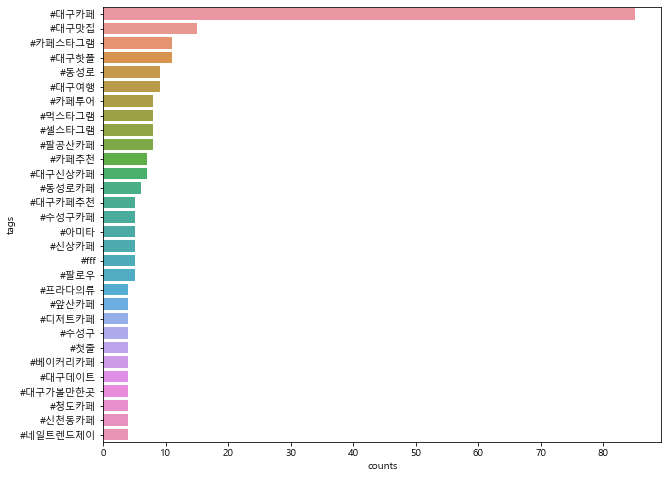

In [34]:
# 막대 차트 그리기
plt.figure(figsize = (10,8))
sns.barplot(x = 'counts', y= 'tags', data = tag_counts_df)
plt.show()

In [41]:
# 워드클라우드 라이브러리 불러오기

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows' :
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == 'Darwin' :
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

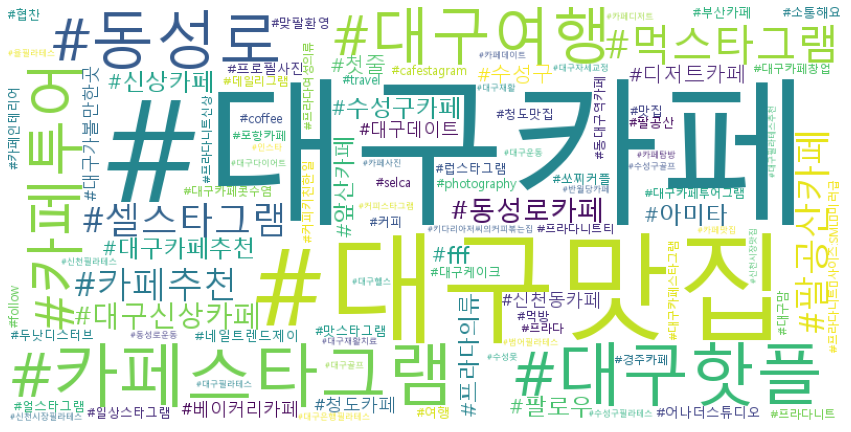

In [43]:
# 워드클라우드 만들기

wordcloud = WordCloud(font_path = font_path,
                     background_color = 'white',
                     max_words = 100,
                     relative_scaling = 0.3,
                     width = 800,
                     height = 400
                     ).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:/Users/JngMK/2021KNUpython2/2.instagram_crawling/files/tag_wordcloud.png')
plt.show()